# Evaluation Project 7

In [117]:
# Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [118]:
# Importing the dataset
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [119]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [120]:
# Checking the shape of the dataset
df.shape

(614, 13)

In [121]:
#Checking names of the columns
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [122]:
#Checking for the datatypes
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [123]:
# Checking for the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

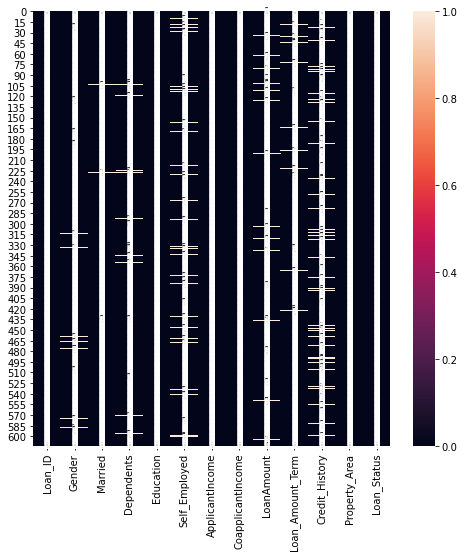

In [124]:
# Visualizing null values using heatmap
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull(),annot=True)
plt.show()

In [125]:
# Separating categorical and numerical variables
df_categorical=df.select_dtypes(include='object')

In [126]:
df_categorical

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [127]:
df_numerical = df.select_dtypes(include=np.number)

In [128]:
df_numerical

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


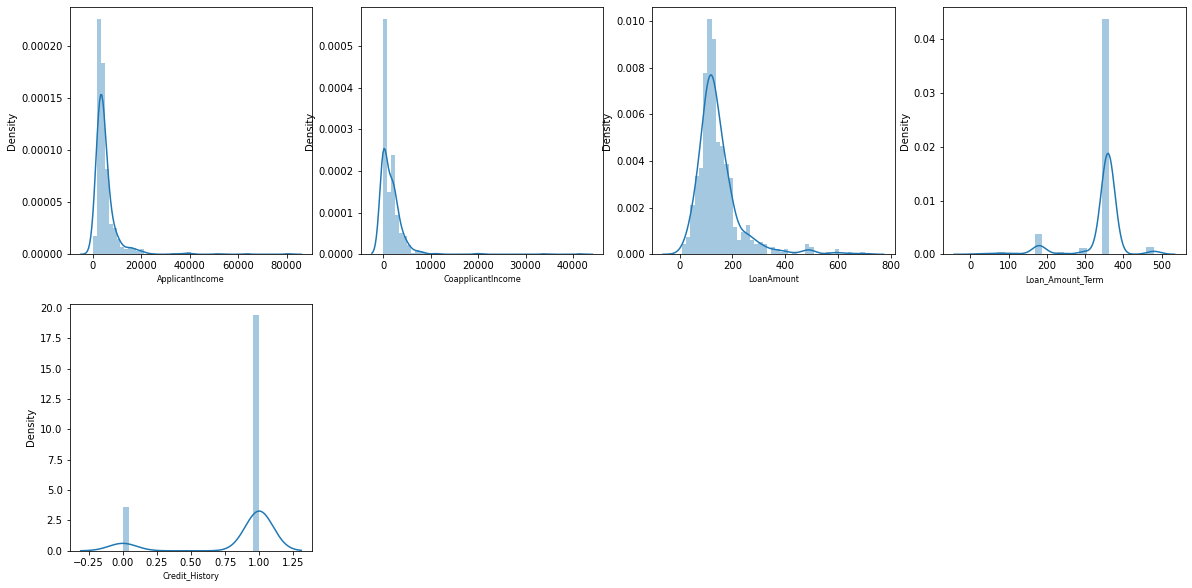

In [129]:
# Checking distribution for numerical columns

plt.figure(figsize=(20,10))
plotnumber=1

for i in df_numerical:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df_numerical[i])
        plt.xlabel(i,fontsize='8')
    plotnumber+=1
plt.show()

The data is highely skewed for all the numerical columns

In [130]:
# Checking the unique counts for each feature
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [131]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [132]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [133]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [134]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [135]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [136]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [137]:
# Handling null values in categorical column
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0]) # filling na values using mode
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [139]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [140]:
# Handling null values in numerical column
#As the data is not normally distributed for loanamount we will use median method to fill the na values
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

In [141]:
df['Loan_Amount_Term']

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 614, dtype: float64

In [142]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [143]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [144]:
# removing unwanted column
#The loan_id is the unique number which will have no impact on the target variable
df.drop(columns='Loan_ID',inplace=True)

In [145]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


## EDA

<AxesSubplot:xlabel='Gender', ylabel='count'>

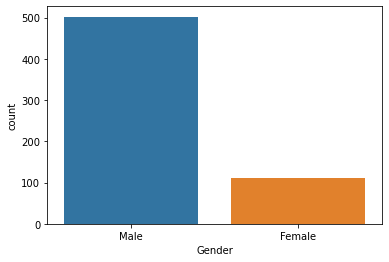

In [146]:
sns.countplot(df["Gender"])

<AxesSubplot:xlabel='Married', ylabel='count'>

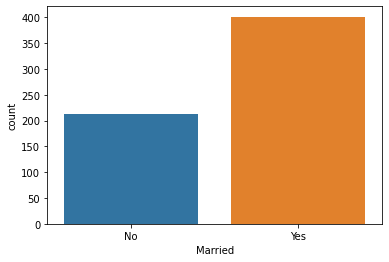

In [147]:
sns.countplot(df["Married"])

The loan applications are more from the married individuals

<AxesSubplot:xlabel='Dependents', ylabel='count'>

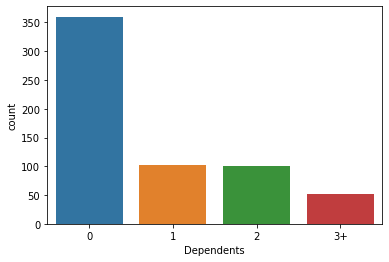

In [148]:
sns.countplot(df["Dependents"])

<AxesSubplot:xlabel='Education', ylabel='count'>

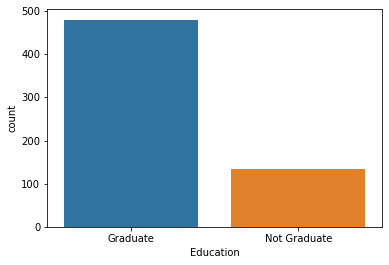

In [149]:
sns.countplot(df["Education"])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

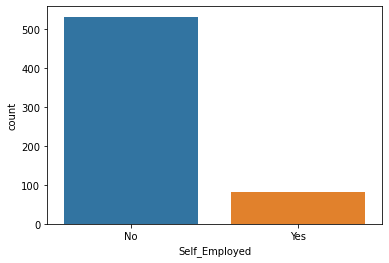

In [150]:
sns.countplot(df["Self_Employed"])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

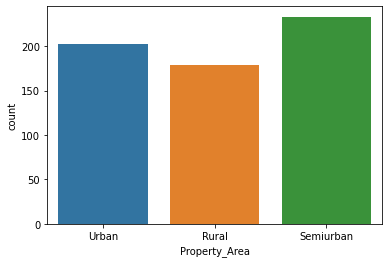

In [151]:
#Property_Area
sns.countplot(df["Property_Area"])

<AxesSubplot:xlabel='Married', ylabel='count'>

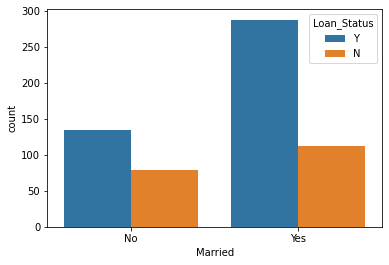

In [152]:
# Bivariate analysis

# Visualizing the count of married applicants on the basis of loan status
sns.countplot(df["Married"],hue=df['Loan_Status'])

The frequency of getting a loan seems to be high for the married applicants

<AxesSubplot:xlabel='Education', ylabel='count'>

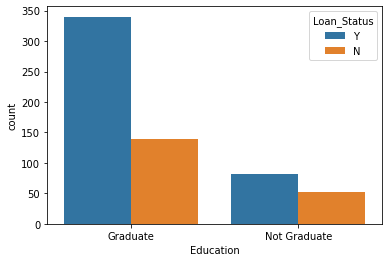

In [153]:
sns.countplot(df["Education"],hue=df['Loan_Status'])

There is a high chance of getting loan approval for the individualswho are graduated

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

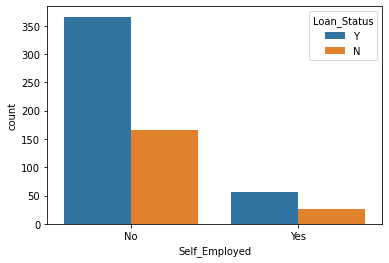

In [154]:
sns.countplot(df["Self_Employed"],hue=df['Loan_Status'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

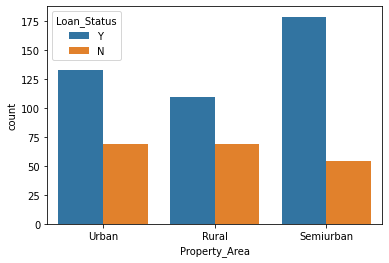

In [155]:
sns.countplot(df["Property_Area"],hue=df['Loan_Status'])

In [156]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='count'>

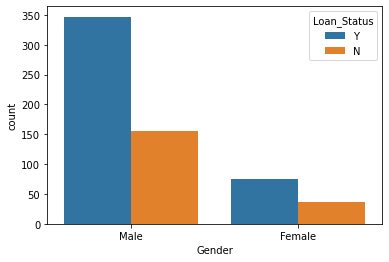

In [157]:
sns.countplot(df["Gender"],hue=df['Loan_Status'])

Text(0.5, 1.0, 'Comparision between Self employed and loan amount')

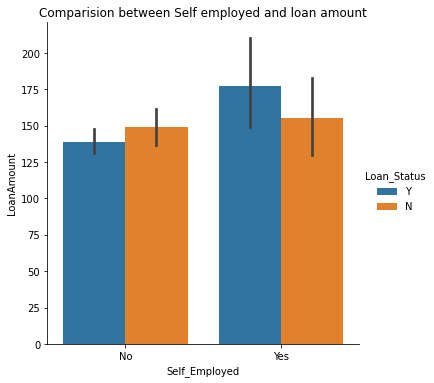

In [158]:
# Comparative analysis
sns.catplot(x="Self_Employed",y="LoanAmount",data=df,kind='bar',hue='Loan_Status')
plt.title("Comparision between Self employed and loan amount")

Text(0.5, 1.0, 'Comparision between Self employed and ApplicantIncome')

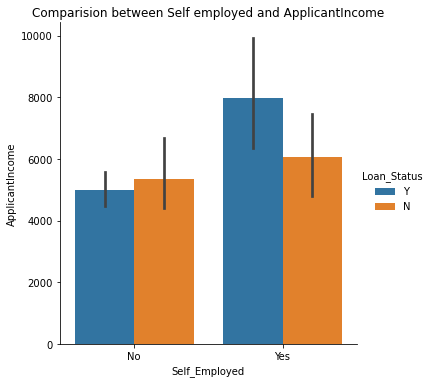

In [159]:
sns.catplot(x="Self_Employed",y="ApplicantIncome",data=df,kind='bar',hue='Loan_Status')
plt.title("Comparision between Self employed and ApplicantIncome")

The self employed have high income and higher chances of loan approval 

Text(0.5, 1.0, 'Comparision between Education and ApplicantIncome')

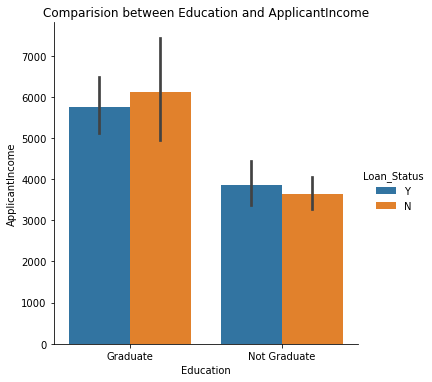

In [160]:
sns.catplot(x="Education",y="ApplicantIncome",data=df,kind='bar',hue='Loan_Status')
plt.title("Comparision between Education and ApplicantIncome")

Text(0.5, 1.0, 'Comparision between Self employed and Credit_History')

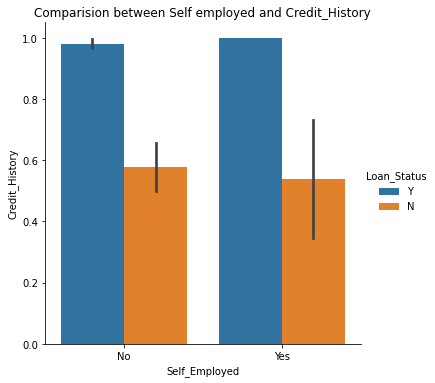

In [161]:
sns.catplot(x="Self_Employed",y="Credit_History",data=df,kind='bar',hue='Loan_Status')
plt.title("Comparision between Self employed and Credit_History")

Text(0.5, 1.0, 'Comparision between Loan_Status and CoapplicantIncome')

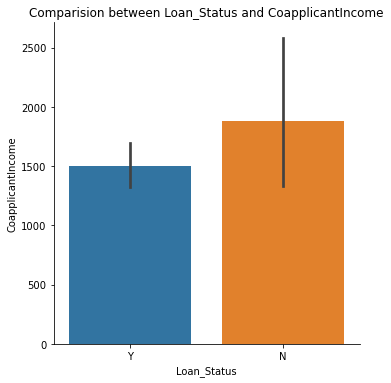

In [162]:
sns.catplot(x="Loan_Status",y="CoapplicantIncome",data=df,kind='bar')
plt.title("Comparision between Loan_Status and CoapplicantIncome")

  ## Multivariate analysis

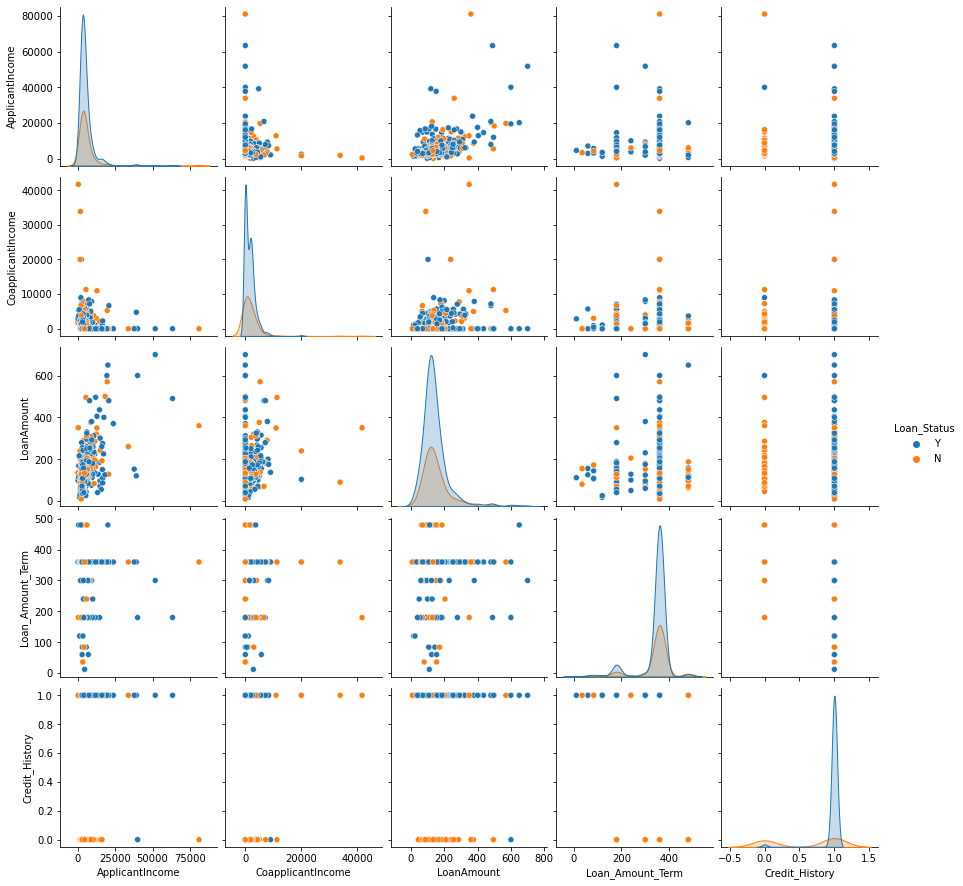

In [163]:
sns.pairplot(df,hue="Loan_Status")

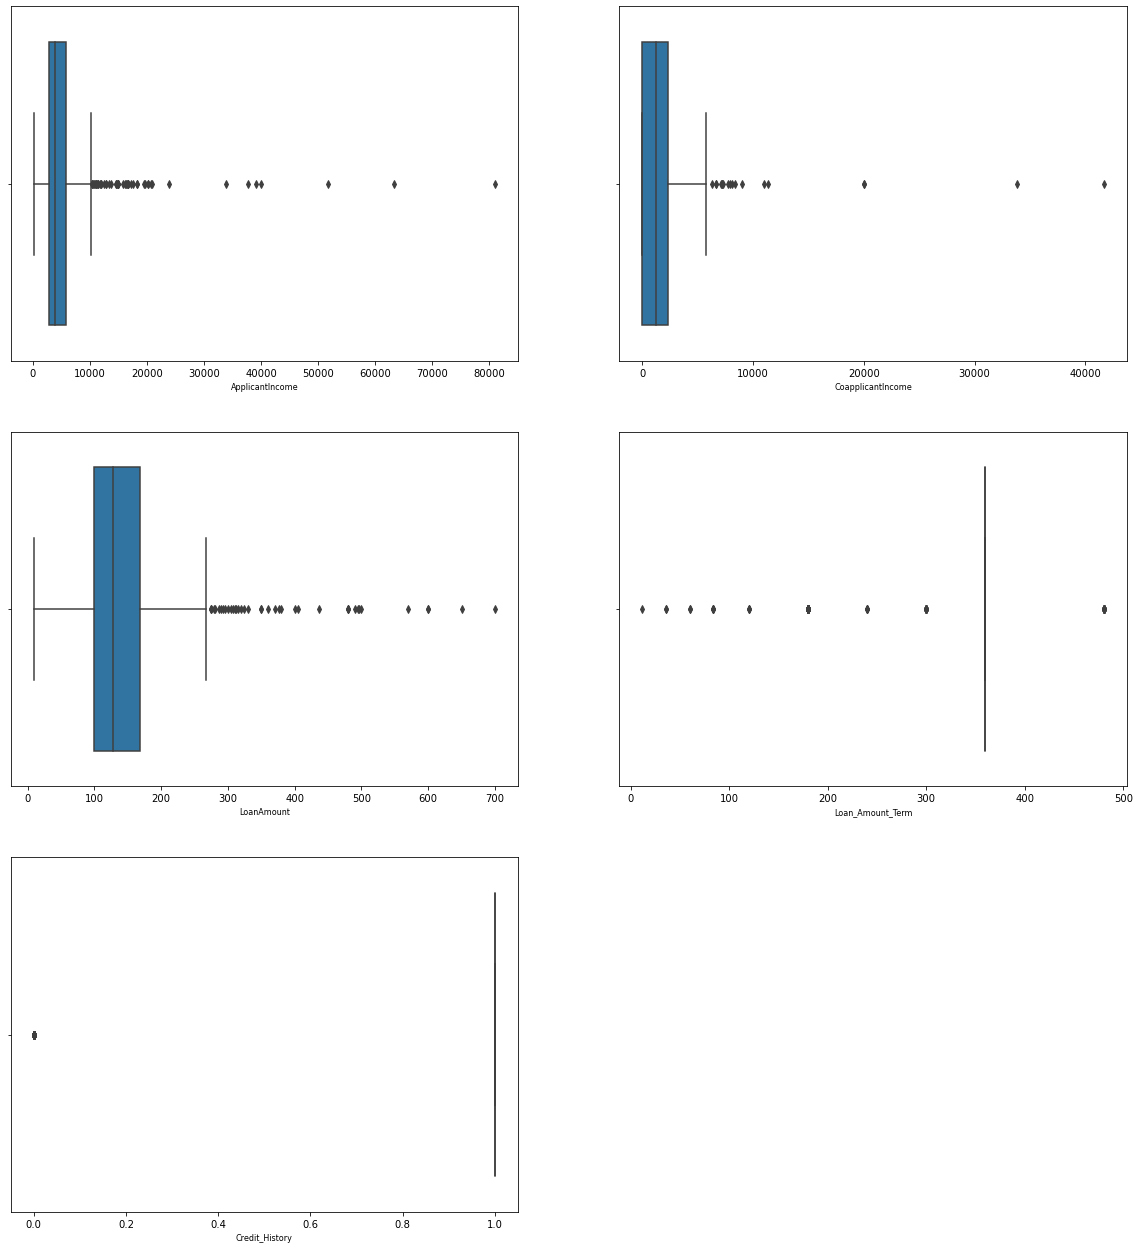

In [172]:
# Identifying the outliers
# Checking the outliers  for each column
plt.figure(figsize=(20,30), facecolor ='white')
pltnumber=1

for i in df_numerical:
    if pltnumber<=8:
        ax=plt.subplot(4,2,pltnumber)
        sns.boxplot(df_numerical[i])
        plt.xlabel(i,fontsize='8')
    pltnumber+=1
plt.show()

In [175]:
# Converting categorical objectives into numerical type
#Importing Label encoder from sklearn library
from sklearn.preprocessing import LabelEncoder

In [177]:
df_categorical.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [178]:
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])
df["Married"]=le.fit_transform(df["Married"])
df["Dependents"]=le.fit_transform(df["Dependents"])
df["Education"]=le.fit_transform(df["Education"])
df["Self_Employed"]=le.fit_transform(df["Self_Employed"])
df["Property_Area"]=le.fit_transform(df["Property_Area"])

In [183]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [181]:
df["Loan_Status"]=le.fit_transform(df["Loan_Status"]) # 1 for yes and 0 for no

In [182]:
# Dealing with outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.47234264, 1.37208932, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.31851281,
        1.48253724],
       [0.47234264, 0.72881553, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       ...,
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 1.24474546, ..., 0.41173269, 1.22329839,
        0.67451931],
       [2.11710719, 1.37208932, 0.73780632, ..., 2.42876026, 0.04760721,
        1.48253724]])

In [184]:
df_z=df[(z<3).all(axis=1)] # removing outliers for z score value of more than 3 

In [185]:
df.shape

(614, 12)

In [186]:
df_z.shape

(577, 12)

In [187]:
#percentage loss
p_loss = (614-577)/614*100

In [188]:
p_loss

6.026058631921824

In [189]:
#Checking for the skewness in the dataset
df_z.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

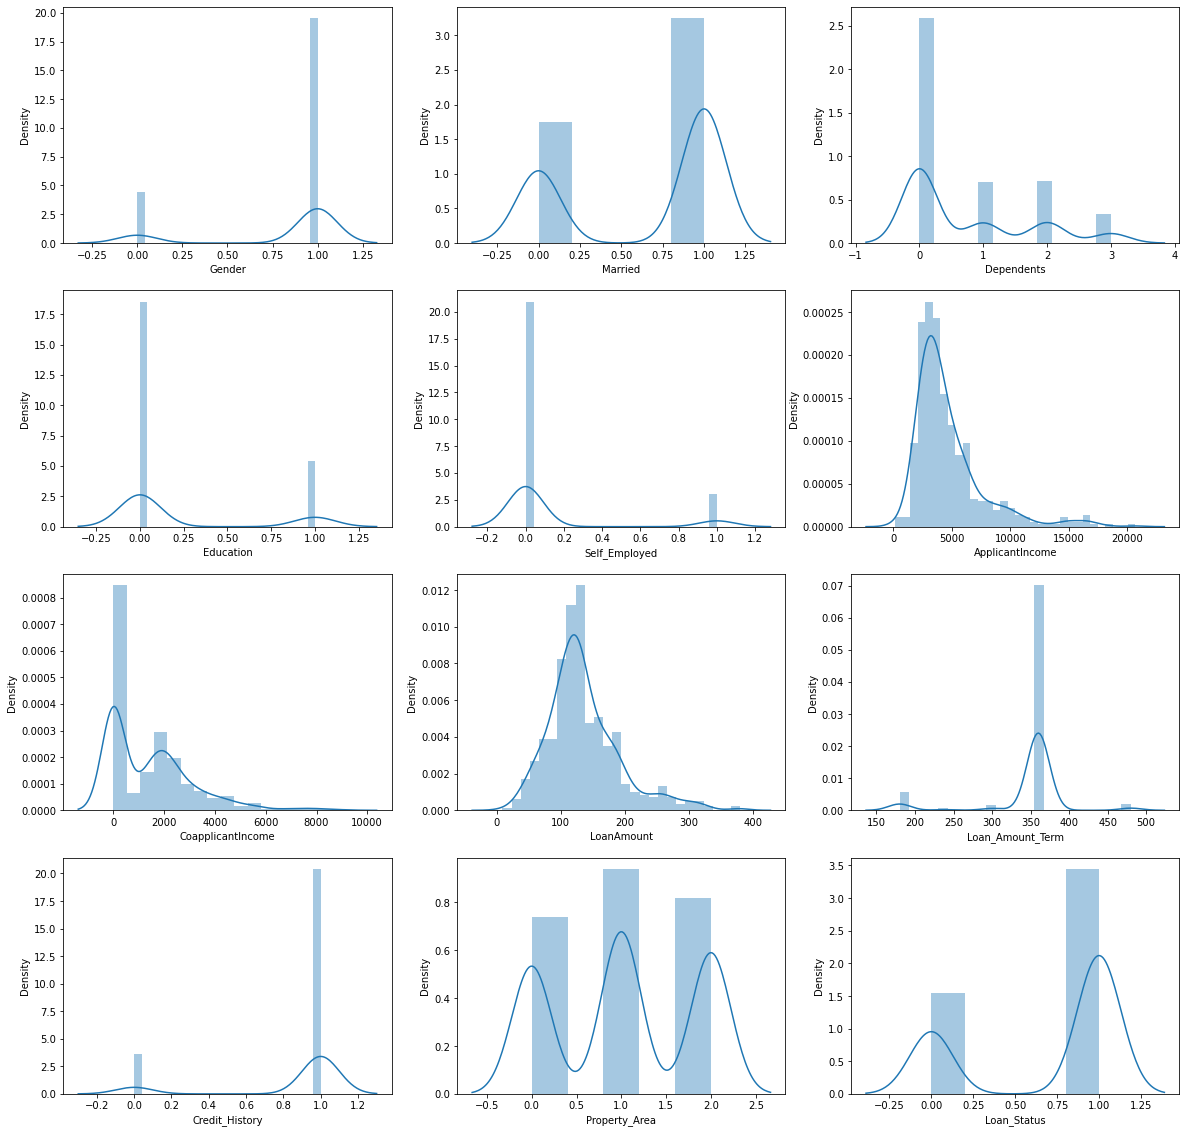

In [191]:
# Checking for the data distribution
# Checking the data distribution
plt.figure(figsize=(20,20), facecolor ='white')
pltnumber=1

for column in df_z:
    if pltnumber<=12:
        ax = plt.subplot(4,3,pltnumber)
        sns.distplot(df_z[column])
        plt.xlabel(column,fontsize=10)
    pltnumber +=1
plt.show()  #plt.show()

In [190]:
df_z.shape

(577, 12)

# Feature Selection

In [193]:
x=df_z.drop(columns=["Loan_Status"],axis=1)
y=df_z["Loan_Status"]

In [194]:
#Removing skewness in the dataset using power transform method
#importing power transform from library
from sklearn.preprocessing import power_transform

In [195]:
x=power_transform(x,method="yeo-johnson")
x

array([[ 0.47713685, -1.36251079, -0.80924269, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.13078824,
         0.41851254, -1.34019905],
       [ 0.47713685,  0.73393914, -0.80924269, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       ...,
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 0.47713685,  0.73393914,  1.34467098, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [-2.09583477, -1.36251079, -0.80924269, ...,  0.13078824,
        -2.38941464,  0.01546372]])

In [196]:
# Scaling the data using standard scaler
#importing standard scaler
from sklearn.preprocessing import StandardScaler

In [197]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_scaled

array([[ 0.47713685, -1.36251079, -0.80924269, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.13078824,
         0.41851254, -1.34019905],
       [ 0.47713685,  0.73393914, -0.80924269, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       ...,
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 0.47713685,  0.73393914,  1.34467098, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [-2.09583477, -1.36251079, -0.80924269, ...,  0.13078824,
        -2.38941464,  0.01546372]])

# Model Building

In [198]:
#importing ml libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [199]:
#Training the model
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.25,random_state=56)

In [200]:
# finding the best model
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
predtc=dtc.predict(x_test)
cvscore=cross_val_score(DecisionTreeClassifier(),x_train,y_train,cv=5).mean()
print(accuracy_score(y_test,predtc))
print(confusion_matrix(y_test,predtc))
print(classification_report(y_test,predtc))
print("cross val score=",(cvscore*100))

0.7310344827586207
[[25 13]
 [26 81]]
              precision    recall  f1-score   support

           0       0.49      0.66      0.56        38
           1       0.86      0.76      0.81       107

    accuracy                           0.73       145
   macro avg       0.68      0.71      0.68       145
weighted avg       0.76      0.73      0.74       145

cross val score= 71.99679230152366


In [201]:
#SVC
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
cvscore=cross_val_score(SVC(),x_train,y_train,cv=5).mean()
print("accuracy score=",accuracy_score(y_test,predsvc))
print("confusion matrix=",confusion_matrix(y_test,predsvc))
print("classification report=",classification_report(y_test,predsvc))
print("cross val score=",(cvscore*100))

accuracy score= 0.8344827586206897
confusion matrix= [[ 15  23]
 [  1 106]]
classification report=               precision    recall  f1-score   support

           0       0.94      0.39      0.56        38
           1       0.82      0.99      0.90       107

    accuracy                           0.83       145
   macro avg       0.88      0.69      0.73       145
weighted avg       0.85      0.83      0.81       145

cross val score= 81.01042502004813


In [202]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
cvscore=cross_val_score(RandomForestClassifier(),x_train,y_train,cv=5).mean()
print("accuracy score=",accuracy_score(y_test,predrfc))
print("confusion matrix=",confusion_matrix(y_test,predrfc))
print("classification report=",classification_report(y_test,predrfc))
print("cross val score=",(cvscore*100))

accuracy score= 0.8
confusion matrix= [[17 21]
 [ 8 99]]
classification report=               precision    recall  f1-score   support

           0       0.68      0.45      0.54        38
           1       0.82      0.93      0.87       107

    accuracy                           0.80       145
   macro avg       0.75      0.69      0.71       145
weighted avg       0.79      0.80      0.79       145

cross val score= 78.93076717455226


In [203]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict(x_test)
cvscore=cross_val_score(GradientBoostingClassifier(),x_train,y_train,cv=5).mean()
print("accuracy score=",accuracy_score(y_test,predgbc))
print("confusion matrix=",confusion_matrix(y_test,predgbc))
print("classification report=",classification_report(y_test,predgbc))
print("cross val score=",(cvscore*100))

accuracy score= 0.8068965517241379
confusion matrix= [[ 16  22]
 [  6 101]]
classification report=               precision    recall  f1-score   support

           0       0.73      0.42      0.53        38
           1       0.82      0.94      0.88       107

    accuracy                           0.81       145
   macro avg       0.77      0.68      0.71       145
weighted avg       0.80      0.81      0.79       145

cross val score= 78.92542101042503


In [204]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
predetc=etc.predict(x_test)
cvscore=cross_val_score(ExtraTreesClassifier(),x_train,y_train,cv=5).mean()
print("accuracy score=",accuracy_score(y_test,predetc))
print("confusion matrix=",confusion_matrix(y_test,predetc))
print("classification report=",classification_report(y_test,predetc))
print("cross val score=",(cvscore*100))

accuracy score= 0.7931034482758621
confusion matrix= [[17 21]
 [ 9 98]]
classification report=               precision    recall  f1-score   support

           0       0.65      0.45      0.53        38
           1       0.82      0.92      0.87       107

    accuracy                           0.79       145
   macro avg       0.74      0.68      0.70       145
weighted avg       0.78      0.79      0.78       145

cross val score= 77.54076450147019


In [205]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
cvscore=cross_val_score(LogisticRegression(),x_train,y_train,cv=5).mean()
print("accuracy score=",accuracy_score(y_test,predlr))
print("confusion matrix=",confusion_matrix(y_test,predlr))
print("classification report=",classification_report(y_test,predlr))
print("cross val score=",(cvscore*100))

accuracy score= 0.8344827586206897
confusion matrix= [[ 15  23]
 [  1 106]]
classification report=               precision    recall  f1-score   support

           0       0.94      0.39      0.56        38
           1       0.82      0.99      0.90       107

    accuracy                           0.83       145
   macro avg       0.88      0.69      0.73       145
weighted avg       0.85      0.83      0.81       145

cross val score= 81.00507885592087


In [206]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
predknc=knc.predict(x_test)
cvscore=cross_val_score(LogisticRegression(),x_train,y_train,cv=5).mean()
print("accuracy score=",accuracy_score(y_test,predknc))
print("confusion matrix=",confusion_matrix(y_test,predknc))
print("classification report=",classification_report(y_test,predknc))
print("cross val score=",(cvscore*100))

accuracy score= 0.8068965517241379
confusion matrix= [[ 15  23]
 [  5 102]]
classification report=               precision    recall  f1-score   support

           0       0.75      0.39      0.52        38
           1       0.82      0.95      0.88       107

    accuracy                           0.81       145
   macro avg       0.78      0.67      0.70       145
weighted avg       0.80      0.81      0.78       145

cross val score= 81.00507885592087


## The accuracy % is 80

In [208]:
# Saving the model

#saving the file
import pickle
filename="income_prediction.pkl"
pickle.dump(knc,open(filename,"wb"))